In [19]:
import numpy as np
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from scipy.stats import halfnorm

In [20]:
df = pd.read_csv('../results/stats/all_species_ne.combined.stats.filtered.csv', sep=',')


In [21]:
df

,Unnamed: 0,chrom,start,end,n_variants,diversity,n_singletons,singleton_proportion,tajima_d,bases,...,freq_median,window_size_mean,sum_n_mean,species,genus,phylogenetic_group,median_predicted_rate,Ne_median,Ne_upper,Ne_lower
0,0,chr1,1600001,1700000,265.0,0.000543,155.0,0.584906,-1.398232,100000.0,...,0.511440,99999.0,50647.125000,Cheracebus_lugens,Cheracebus,New_world_monkeys,7.769189e-09,43851.101463,51099.766771,37691.201743
1,1,chr1,1800001,1900000,200.0,0.000439,89.0,0.445000,-1.180108,100000.0,...,0.624306,99999.0,61995.750000,Cheracebus_lugens,Cheracebus,New_world_monkeys,7.769189e-09,43851.101463,51099.766771,37691.201743
2,2,chr1,1900001,2000000,332.0,0.000877,108.0,0.325301,-0.539073,100000.0,...,0.556926,99999.0,55266.250000,Cheracebus_lugens,Cheracebus,New_world_monkeys,7.769189e-09,43851.101463,51099.766771,37691.201743
3,3,chr1,2000001,2100000,292.0,0.000708,131.0,0.448630,-0.855039,100000.0,...,0.543250,99999.0,53921.125000,Cheracebus_lugens,Cheracebus,New_world_monkeys,7.769189e-09,43851.101463,51099.766771,37691.201743
4,4,chr1,2200001,2300000,267.0,0.000631,119.0,0.445693,-0.939903,100000.0,...,0.697112,99999.0,69178.500000,Cheracebus_lugens,Cheracebus,New_world_monkeys,7.769189e-09,43851.101463,51099.766771,37691.201743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818186,3818186,chr9,134800001,134900000,510.0,0.001070,226.0,0.443137,-0.964267,100000.0,...,0.530415,99999.0,49476.000000,Pan_paniscus,Pan,Great_apes,1.071039e-08,22035.798423,25789.453144,19372.684874
3818187,3818187,chr9,134900001,135000000,380.0,0.000736,180.0,0.473684,-1.206037,100000.0,...,0.612326,99999.0,57539.692308,Pan_paniscus,Pan,Great_apes,1.071039e-08,22035.798423,25789.453144,19372.684874
3818188,3818188,chr9,135000001,135100000,477.0,0.001095,180.0,0.377358,-0.668335,100000.0,...,0.607536,99999.0,57009.307692,Pan_paniscus,Pan,Great_apes,1.071039e-08,22035.798423,25789.453144,19372.684874
3818189,3818189,chr9,135400001,135500000,524.0,0.001161,176.0,0.335878,-0.790234,100000.0,...,0.598636,99999.0,55502.769231,Pan_paniscus,Pan,Great_apes,1.071039e-08,22035.798423,25789.453144,19372.684874


In [22]:
neutral_pi = 0.0019891614255765
df = df[df['species']=='Pan_troglodytes'][['diversity','cm_per_mb']]

In [23]:
df

,diversity,cm_per_mb
2239884,0.001595,0.032423
2239885,0.001722,0.420616
2239886,0.002110,3.020346
2239887,0.002695,2.534109
2239888,0.001799,4.769784
...,...,...
2264887,0.002400,3.539108
2264888,0.002371,8.520170
2264889,0.001629,0.002691
2264890,0.001960,3.454621


In [24]:
df = df[df['cm_per_mb']<2.5]
df['diversity'] = df['diversity']*100
df = df[df['cm_per_mb']>0]
df = df.dropna()

/tmp/ipykernel_1801867/3848281115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diversity'] = df['diversity']*100


In [25]:
df

,diversity,cm_per_mb
2239884,0.159456,0.032423
2239885,0.172151,0.420616
2239892,0.268020,1.801219
2239895,0.326939,1.420448
2239898,0.374873,1.173069
...,...,...
2264874,0.229663,2.045797
2264876,0.162059,0.766296
2264883,0.190828,2.252819
2264889,0.162901,0.002691


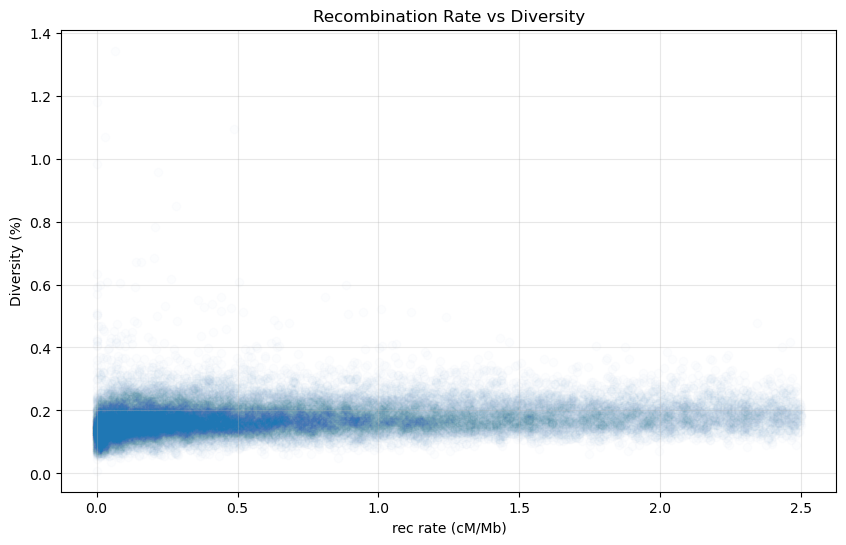

In [26]:
df['true_rec'] = df['cm_per_mb'] / 10**8

# Step 2: Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(df['cm_per_mb'], df['diversity'], alpha=0.01)
plt.xlabel('rec rate (cM/Mb)')
plt.ylabel('Diversity (%)')
plt.title('Recombination Rate vs Diversity')
plt.grid(True, alpha=0.3)


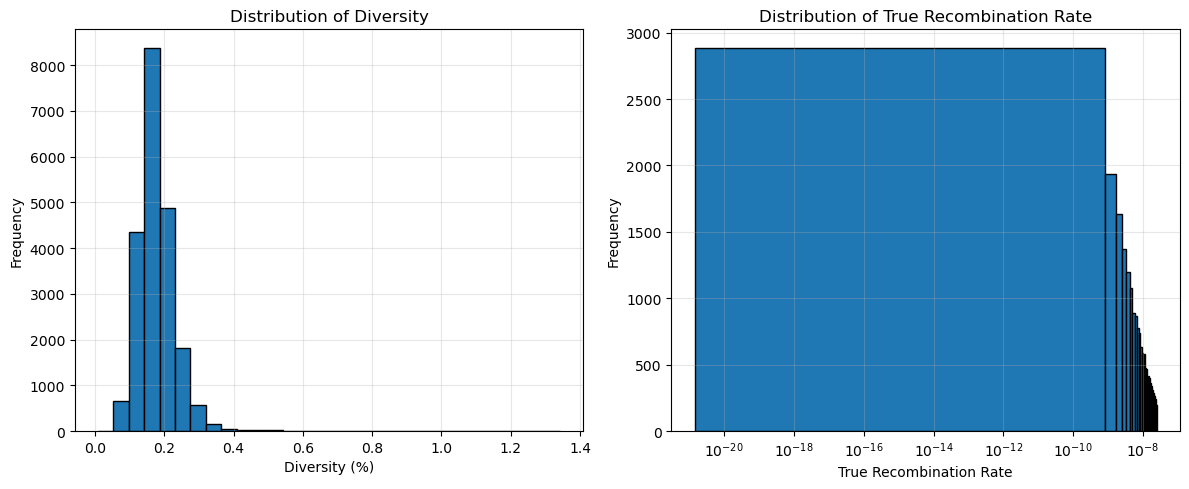

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot diversity distribution
ax1.hist(df['diversity'], bins=30, edgecolor='black')
ax1.set_xlabel('Diversity (%)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Diversity')
ax1.grid(True, alpha=0.3)

# Plot true_rec distribution with log scale
ax2.hist(df['true_rec'], bins=30, edgecolor='black')
ax2.set_xlabel('True Recombination Rate')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of True Recombination Rate')
ax2.set_xscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


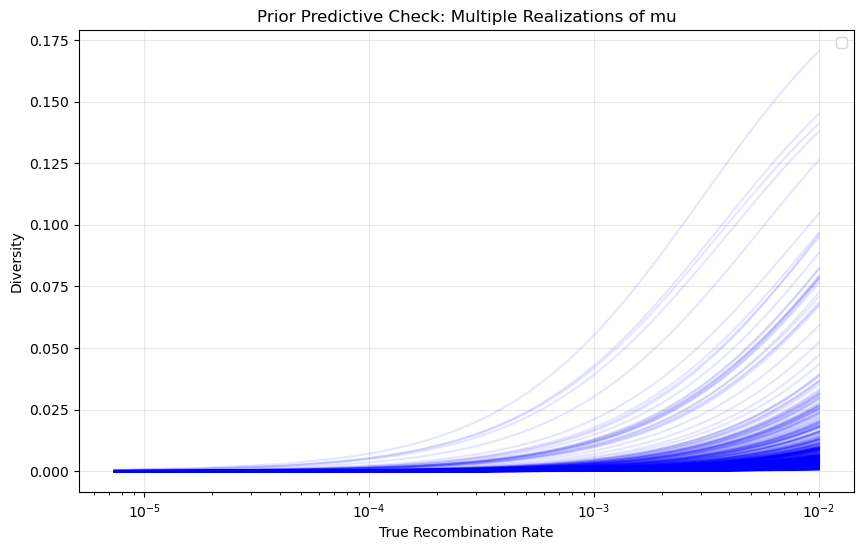

In [28]:
# prior predictive
plt.figure(figsize=(10, 6))
true_rec = np.random.uniform(1e-9,1e-2,1000)

# Draw multiple lines from the prior
for _ in range(1000):
    neutral_pi_sample = np.random.normal(0.2,0.01)
    alpha_sample = halfnorm.rvs(loc=0, scale=1)
    
    # Sort true_rec for smooth line plotting
    sorted_rec = np.sort(true_rec)
    mu_sample = neutral_pi_sample * sorted_rec / (sorted_rec + alpha_sample)
    
    plt.plot(sorted_rec, mu_sample, alpha=0.1, color='blue')

plt.xlabel('True Recombination Rate')
plt.ylabel('Diversity')
plt.title('Prior Predictive Check: Multiple Realizations of mu')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.legend()

In [29]:
# Step 3: Define and run the PyMC model
# The model is: pi ~ neutral_pi * true_rec / (true_rec + alpha)

# Convert pandas Series to numpy arrays for PyMC compatibility
true_rec_array = df['true_rec'].values
diversity_array = df['diversity'].values

with pm.Model() as model:
    # Priors for parameters
    # Using slightly informative priors based on the scale of data and the R example
    neutral_pi = pm.Normal('neutral_pi', mu =0.2, sigma=0.01)
    alpha = pm.HalfNormal('alpha',sigma=1)
    
    # Register data as a PyMC variable
    true_rec = pm.Data('true_rec', true_rec_array)
    
    # Expected value according to the model
    mu = neutral_pi * true_rec / (true_rec + alpha)
    
    # Add observation noise
    sigma = pm.HalfNormal('sigma', sigma=0.01)
    
    # Likelihood
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=diversity_array)
    
    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

/home/bjarkemp/miniforge3/envs/pymc/lib/python3.11/site-packages/pymc/data.py:434: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [neutral_pi, alpha, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 10 seconds.


array([[<Axes: title={'center': 'neutral_pi'}>,
        <Axes: title={'center': 'neutral_pi'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

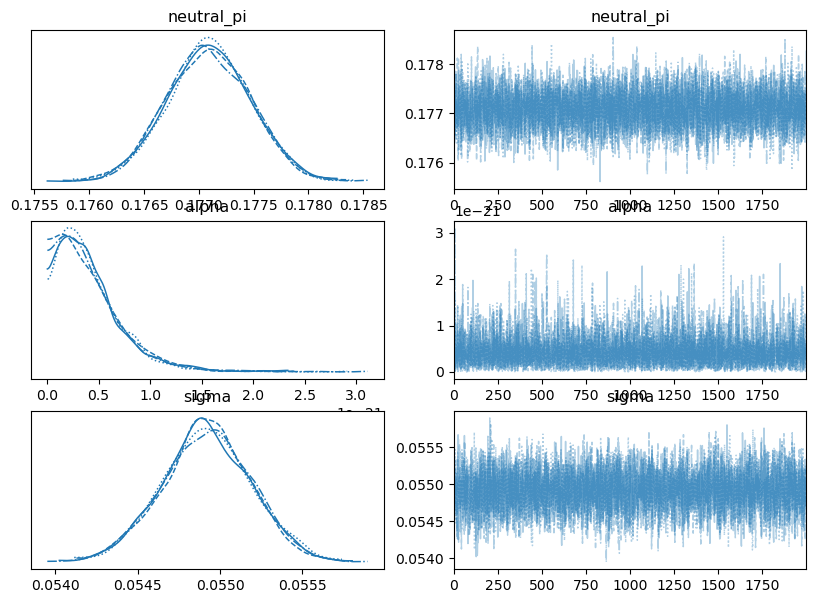

In [30]:
az.plot_trace(trace, figsize=(10, 7))

Sampling: [y]


/home/bjarkemp/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/plots/ppcplot.py:267: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  flatten_pp = list(predictive_dataset.dims.keys())
/home/bjarkemp/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/plots/ppcplot.py:271: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  flatten = list(observed_data.dims.keys())


<Axes: xlabel='y'>

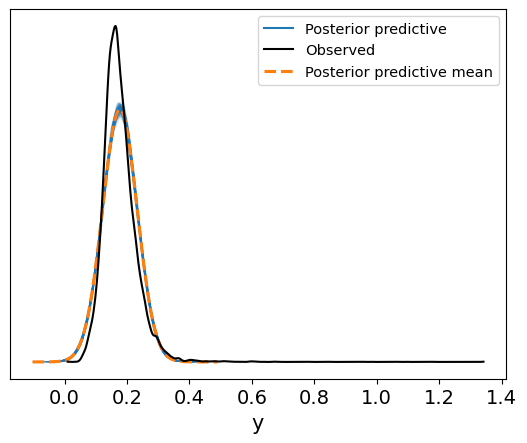

In [31]:
with model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)
az.plot_ppc(trace, num_pp_samples=100)

In [32]:
az.summary(trace, kind="stats")

,mean,sd,hdi_3%,hdi_97%
neutral_pi,0.177,0.0,0.176,0.178
alpha,0.000,0.0,0.000,0.000
sigma,0.055,0.0,0.054,0.055


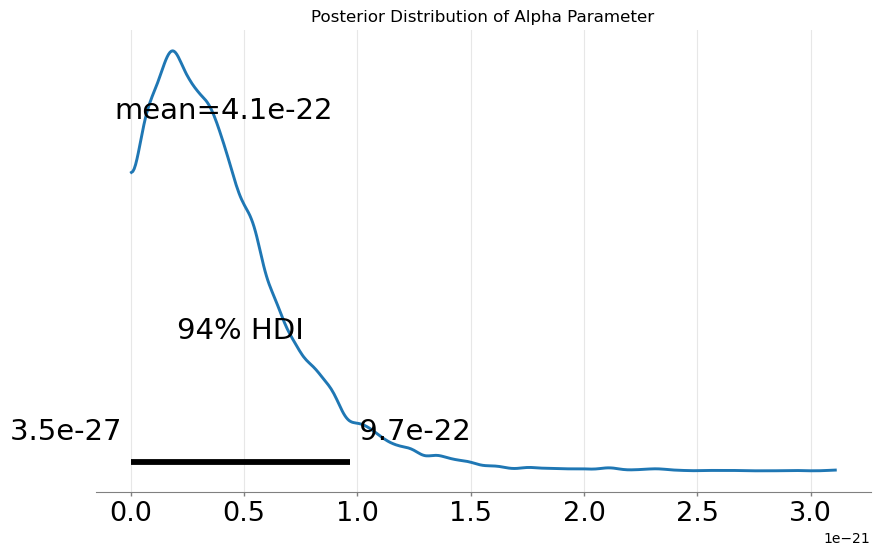

In [33]:
# Plot the posterior distribution of alpha
az.plot_posterior(trace, var_names=['alpha'], figsize=(10, 6))
plt.title('Posterior Distribution of Alpha Parameter')
plt.grid(True, alpha=0.3)

# BGS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


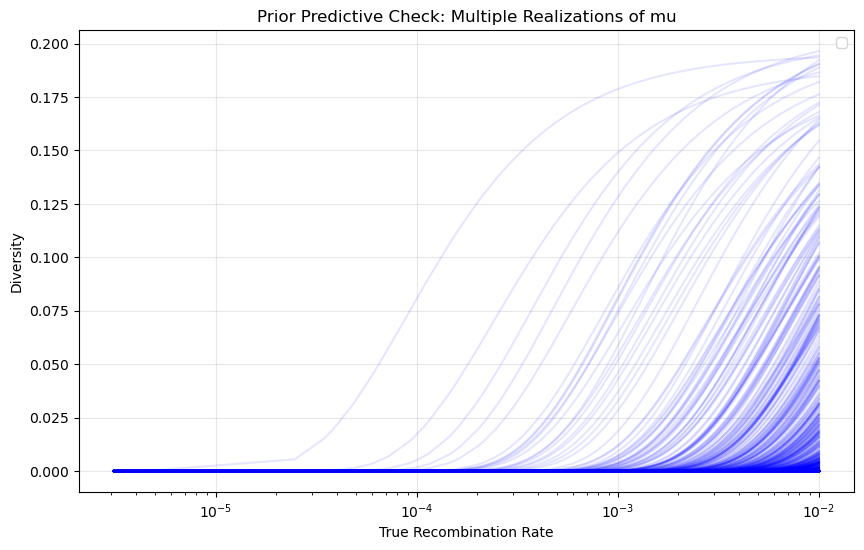

In [34]:
# prior predictive
import math

plt.figure(figsize=(10, 6))
true_rec = np.random.uniform(1e-9,1e-2,1000)

# Draw multiple lines from the prior
for _ in range(1000):
    neutral_pi_sample = np.random.normal(0.2,0.01)
    alpha_sample = halfnorm.rvs(loc=0, scale=0.1)
    
    # Sort true_rec for smooth line plotting
    sorted_rec = np.sort(true_rec)
    mu_sample = neutral_pi_sample * np.exp(-alpha_sample / sorted_rec)
    
    plt.plot(sorted_rec, mu_sample, alpha=0.1, color='blue')

plt.xlabel('True Recombination Rate')
plt.ylabel('Diversity')
plt.title('Prior Predictive Check: Multiple Realizations of mu')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.legend()

In [35]:
# Convert pandas Series to numpy arrays for PyMC compatibility
true_rec_array = df['true_rec'].values
diversity_array = df['diversity'].values

with pm.Model() as bgs_model:
    # Priors for parameters
    # Using slightly informative priors based on the scale of data
    neutral_pi = pm.Normal('neutral_pi',mu=0.2,sigma=0.01)
    alpha = pm.HalfNormal('alpha',sigma=0.1)
    
    # Register data as a PyMC variable
    true_rec = pm.Data('true_rec', true_rec_array)
    
    # Expected value according to the BGS model
    # Using pm.math.exp to ensure proper tensor operations
    mu = neutral_pi * pm.math.exp(-alpha / true_rec)
    
    # Add observation noise
    sigma = pm.HalfNormal('sigma', sigma=0.01)
    
    # Likelihood
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=diversity_array)
    
    # Sample from the posterior
    trace_bgs = pm.sample(2000, tune=1000, return_inferencedata=True)

# Step 4: Analyze the results
summary_bgs = az.summary(trace_bgs)
print("\nPyMC BGS model parameter estimates:")
print(summary_bgs[['mean', 'sd', 'hdi_3%', 'hdi_97%']])

/home/bjarkemp/miniforge3/envs/pymc/lib/python3.11/site-packages/pymc/data.py:434: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [neutral_pi, alpha, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.



PyMC BGS model parameter estimates:
             mean   sd  hdi_3%  hdi_97%
neutral_pi  0.177  0.0   0.176    0.178
alpha       0.000  0.0   0.000    0.000
sigma       0.055  0.0   0.054    0.055


Sampling: [y]


/home/bjarkemp/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/plots/ppcplot.py:267: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  flatten_pp = list(predictive_dataset.dims.keys())
/home/bjarkemp/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/plots/ppcplot.py:271: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  flatten = list(observed_data.dims.keys())


<Axes: xlabel='y'>

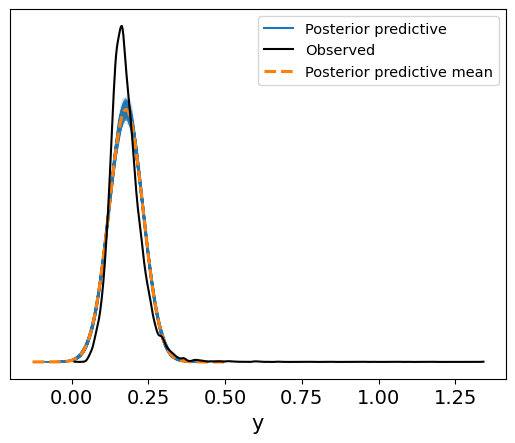

In [36]:
with bgs_model:
    pm.sample_posterior_predictive(trace_bgs, extend_inferencedata=True)
az.plot_ppc(trace_bgs, num_pp_samples=1000)

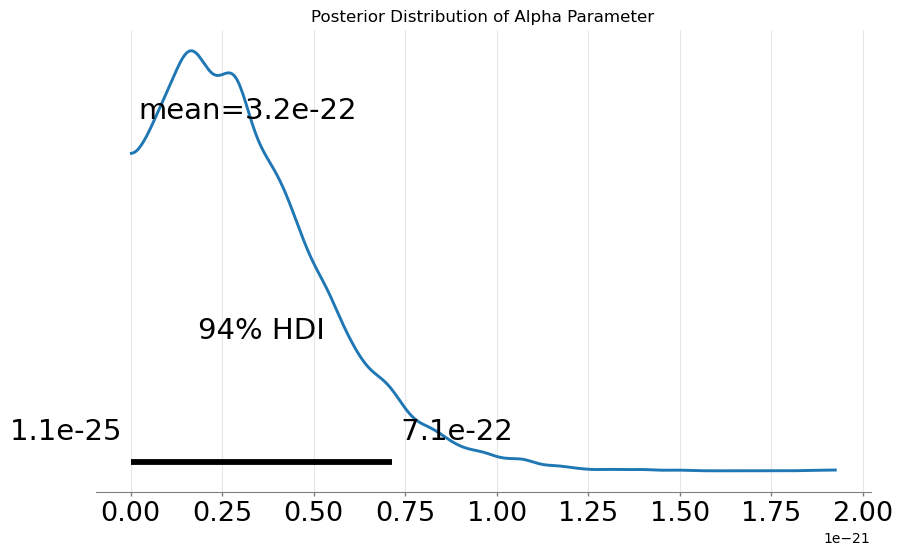

In [37]:
# Plot the posterior distribution of alpha
az.plot_posterior(trace_bgs, var_names=['alpha'], figsize=(10, 6))
plt.title('Posterior Distribution of Alpha Parameter')
plt.grid(True, alpha=0.3)